In [95]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Reading and Distributing Data**

In [96]:
df=pd.read_csv('Chennai Housing Sale.csv')

In [97]:
df=df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

In [98]:
categorical_features = [x for x in df.columns if not (df[x].dtype == np.float64 or df[x].dtype == np.int64)]
print(categorical_features)

['AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


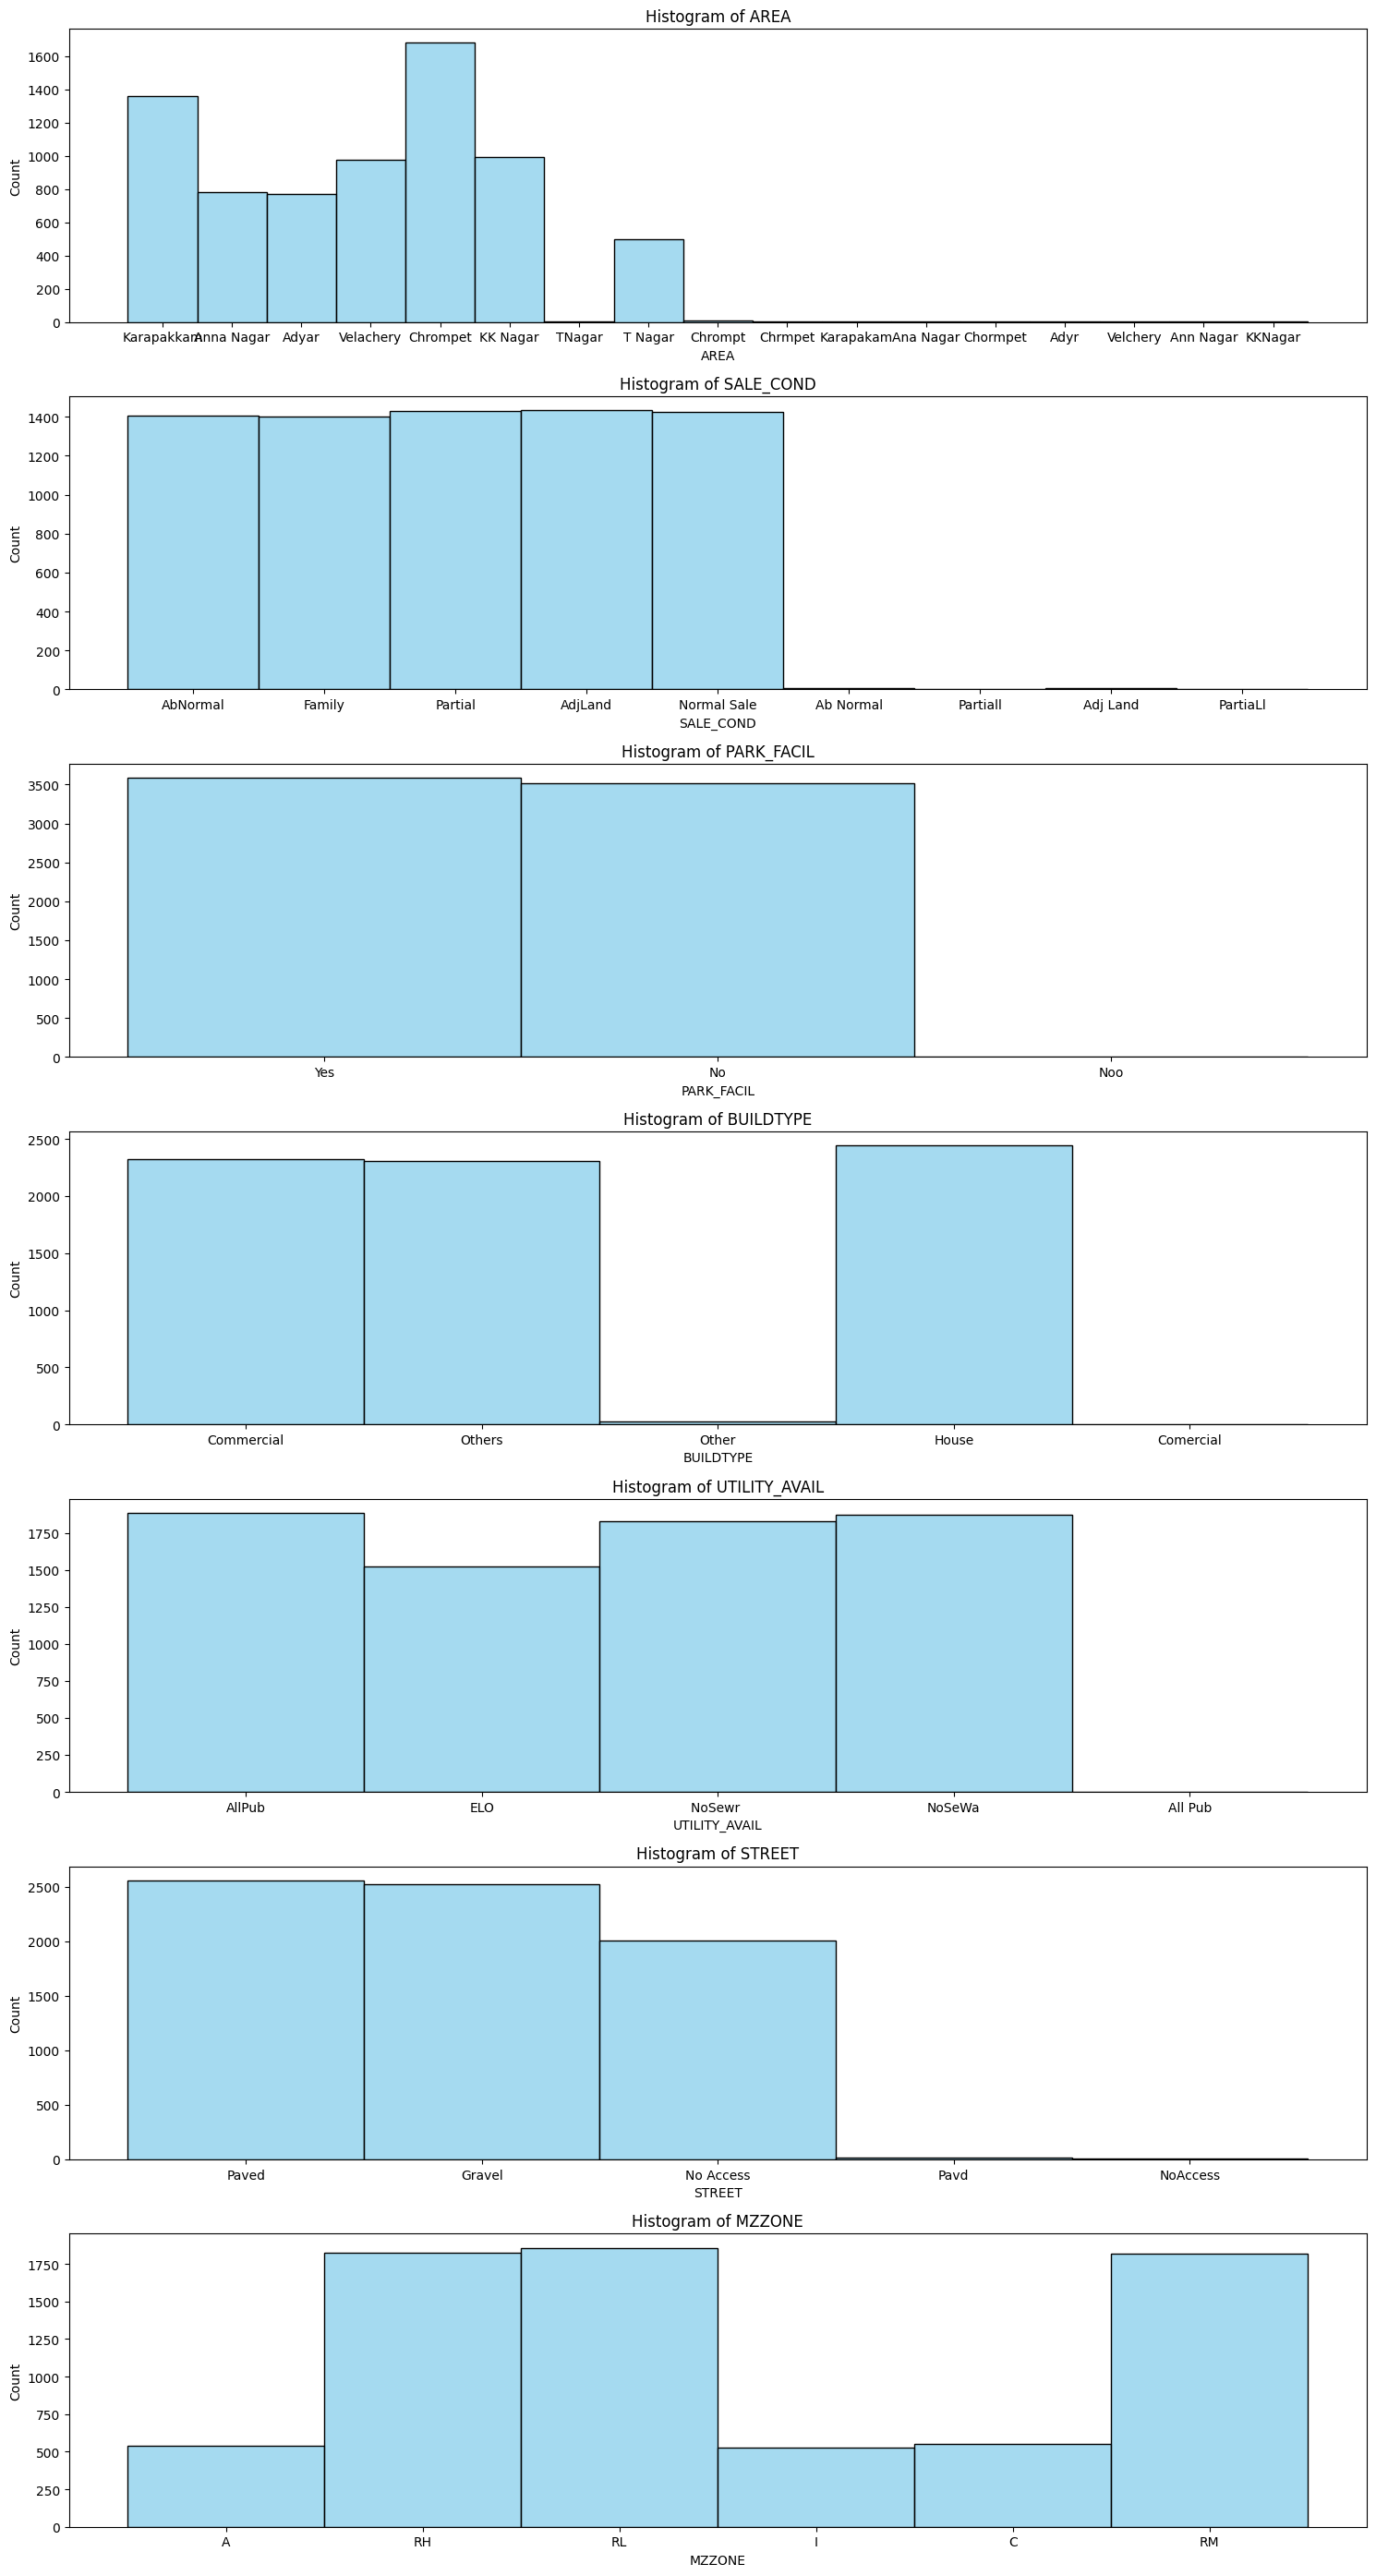

In [99]:

boxplot_vars = ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']
plt.figure(figsize=(15, len(boxplot_vars) * 4))

for i, var in enumerate(boxplot_vars, 1):
    plt.subplot(len(boxplot_vars), 1, i)  # One column layout
    sns.histplot(df[var], bins=20, color='skyblue')
    plt.title(f'Histogram of {var}')

plt.tight_layout()
plt.show()


In [100]:
numerical_features=[x for x in df.columns if df[x].dtype == np.int64 or df[x].dtype == np.float64]
print(numerical_features)

['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE (Target)']


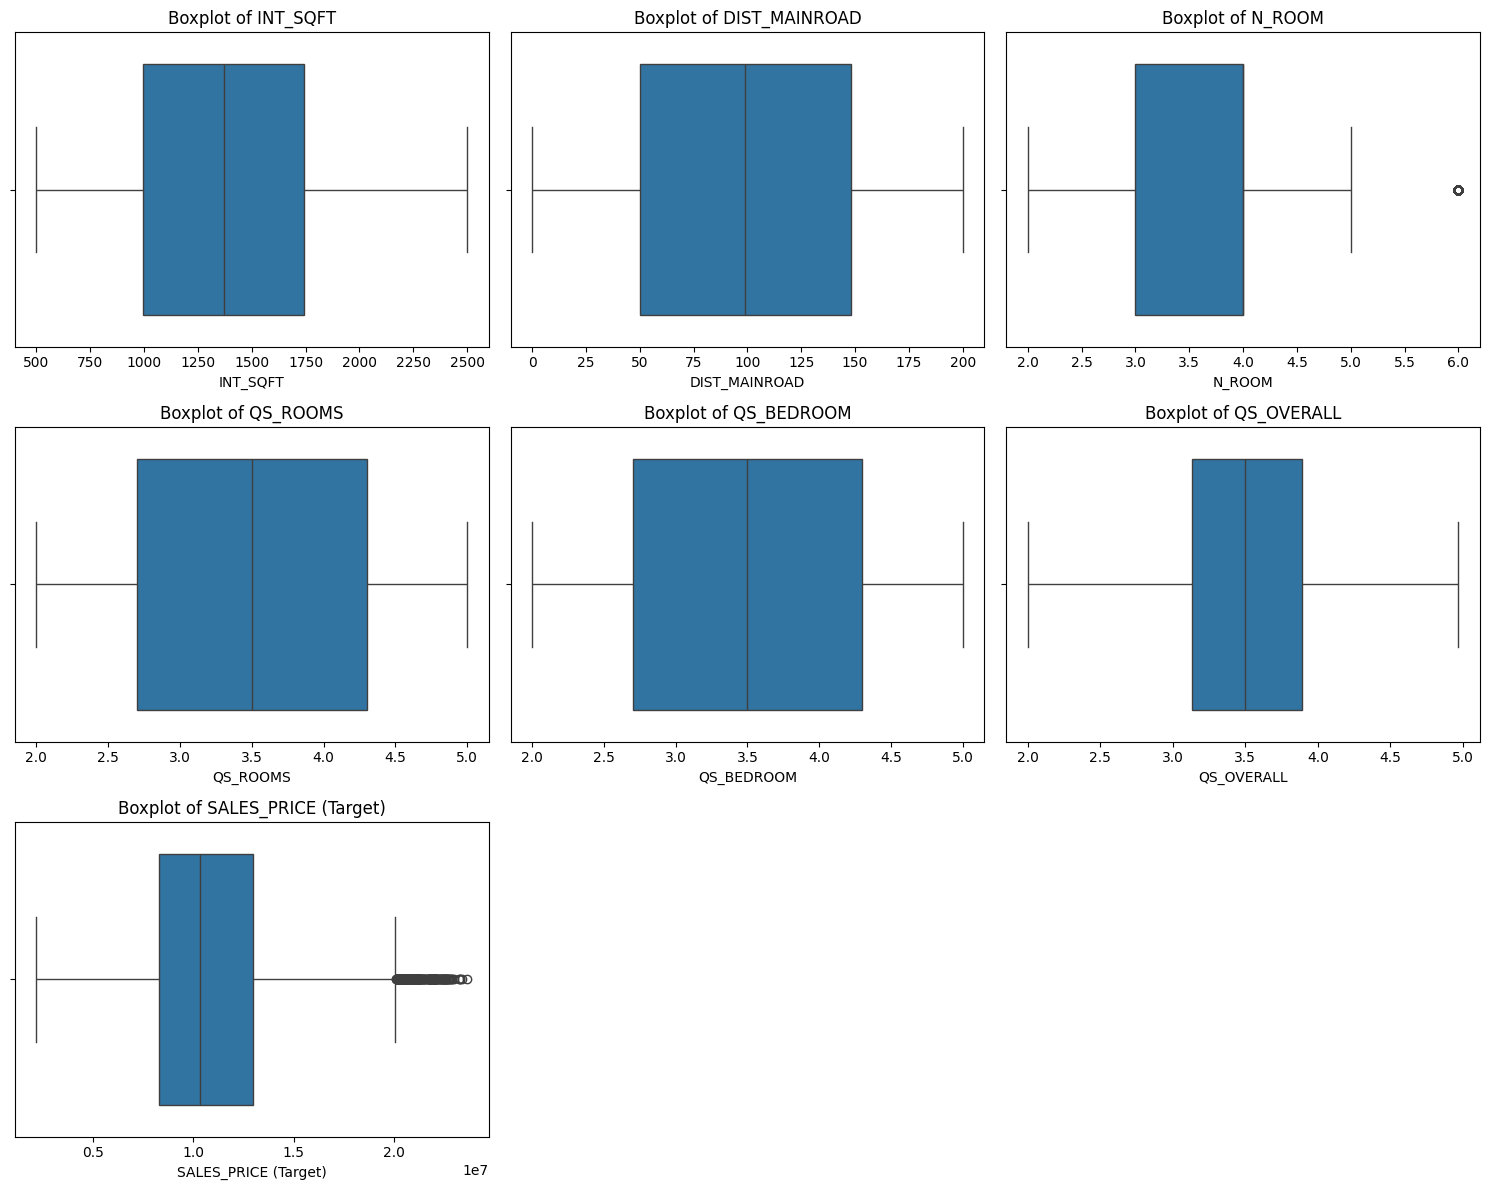

In [101]:
plt.figure(figsize=(15, 12))
boxplot_vars = ['INT_SQFT', 'DIST_MAINROAD', 'N_ROOM', 'QS_ROOMS', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE (Target)']

for i, var in enumerate(boxplot_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

In [102]:
print(f'The data has {len(categorical_features)} categorical features')
print(f'The data has {len(numerical_features)} numerical_features')

The data has 9 categorical features
The data has 10 numerical_features


# **Checking for Null Values**

In [103]:
pd.DataFrame(df.isnull().sum()).T

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE (Target)
0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,48,0


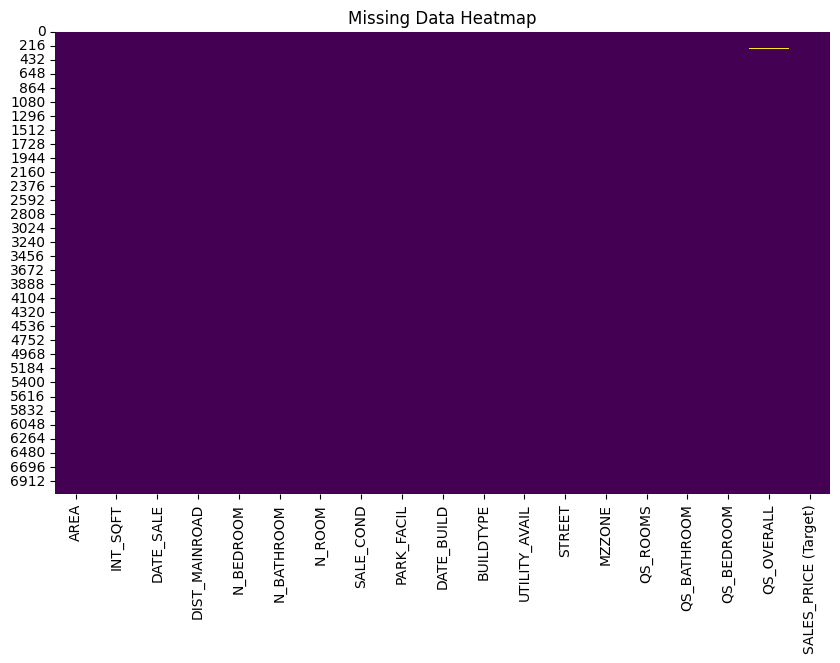

In [104]:
# Heatmap of missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## **Filling in Null Values**

In [105]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mean())
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mean())
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

df['N_BEDROOM'] = np.floor(df['N_BEDROOM'])
df['N_BATHROOM'] = np.floor(df['N_BATHROOM'])

### **Correcting Spelling Mistakes**

In [106]:
df['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)
df['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'],inplace=True)
df['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)
df['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'],inplace=True)
df['AREA'].replace(['Ana Nagar','Ann Nagar','Karapakam','Chrompt','Chrmpet','Chormpet','Adyr','Velchery','KKNagar','TNagar'],
['Anna Nagar','Anna Nagar','Karapakkam','Chrompet','Chrompet','Chrompet','Adyar','Velachery','KK Nagar','T Nagar'],
inplace=True)

C:\Users\resea\AppData\Local\Temp\ipykernel_52092\2697385395.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)
C:\Users\resea\AppData\Local\Temp\ipykernel_52092\2697385395.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

### **Creating a new feature {SOLD_AGE} instead of {DATE_SALE} & {DATE_BUILD}**

In [107]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'], format='%d/%m/%Y', dayfirst=True)
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
pd.DataFrame(df.dtypes.value_counts()).T

C:\Users\resea\AppData\Local\Temp\ipykernel_52092\937226682.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])


,object,float64,int64,datetime64[ns]
count,7,6,4,2


In [108]:
df['BUILD_YEAR'] = df['DATE_BUILD'].dt.year
df['SALE_YEAR'] = df['DATE_SALE'].dt.year

In [109]:
df["SOLD_AGE"]=df['SALE_YEAR']-df['BUILD_YEAR']

## **Checking Linear Relationship**

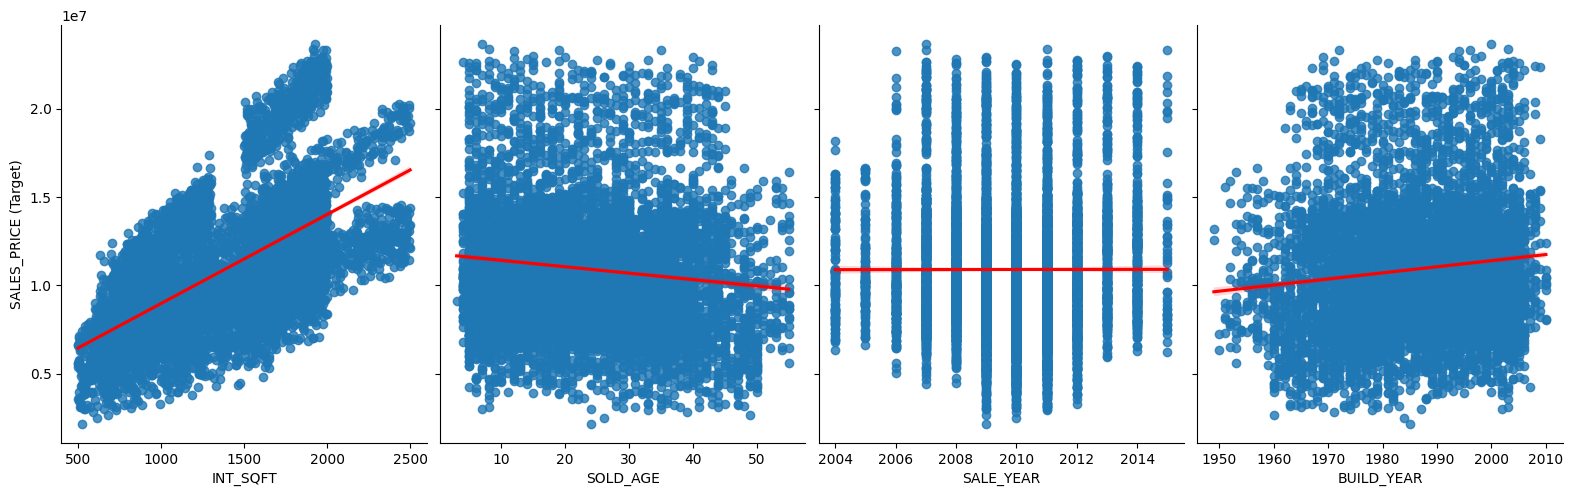

In [110]:
sns.pairplot(df,x_vars=["INT_SQFT", "SOLD_AGE","SALE_YEAR","BUILD_YEAR"], y_vars=["SALES_PRICE (Target)"], height=5,aspect=.8, kind="reg",plot_kws={'line_kws': {'color': 'red'}})
plt.show()

- ***The graph suggests that only "INT_SQFT" has the clear linear relation with the target_variable('SALES_PRICE (Target)'), others are flatten.***

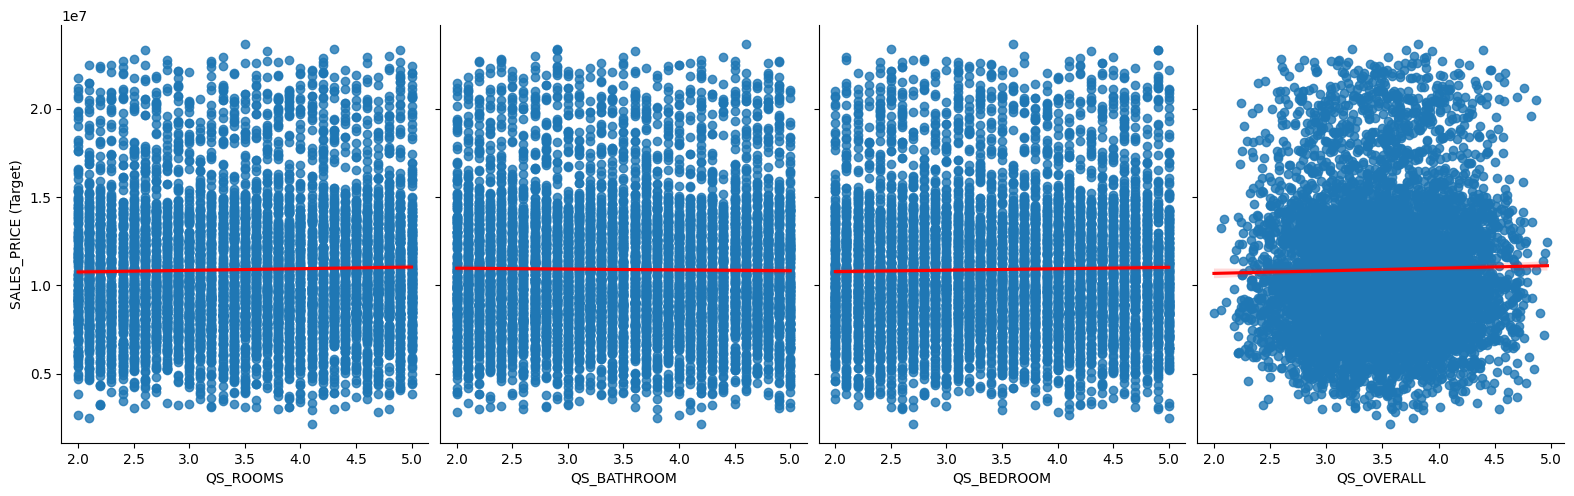

In [111]:
sns.pairplot(df,x_vars=["QS_ROOMS", "QS_BATHROOM","QS_BEDROOM","QS_OVERALL"], y_vars=["SALES_PRICE (Target)"], height=5, aspect=.8, kind="reg", plot_kws={'line_kws': {'color': 'red'}})
plt.show()

- ***The above graph shows no feature has the linear relationship with the target_variable ('SALES_PRICE (Target)').***

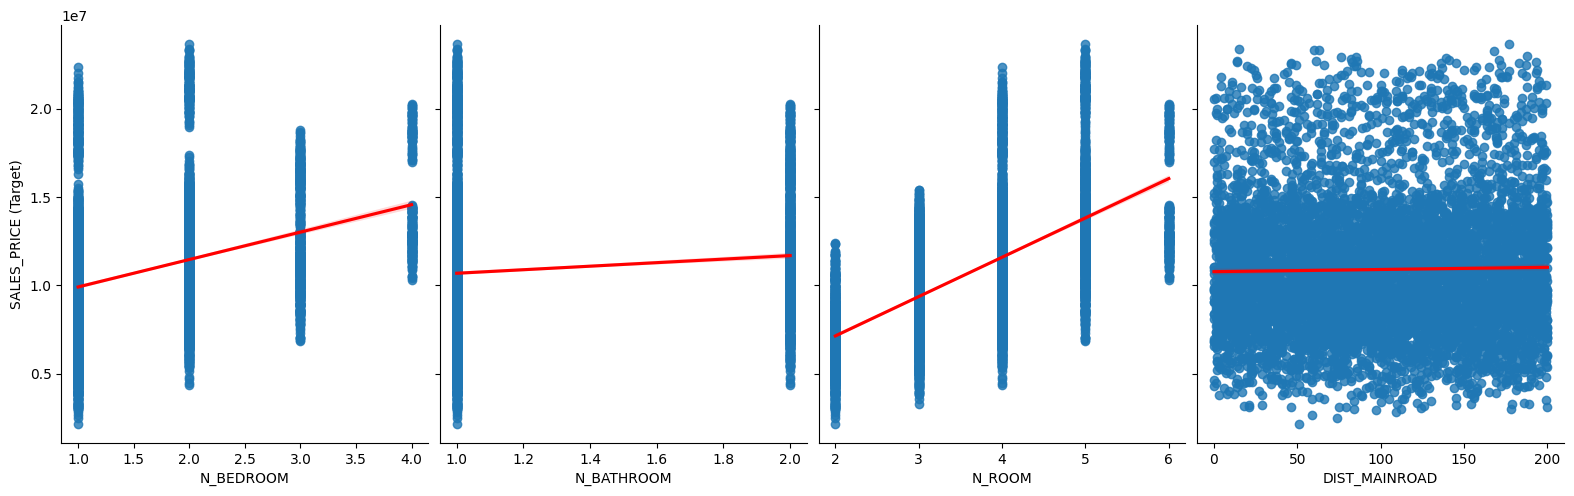

In [112]:
sns.pairplot(df,x_vars=["N_BEDROOM", "N_BATHROOM","N_ROOM","DIST_MAINROAD"], y_vars=["SALES_PRICE (Target)"], height=5, aspect=.8, kind="reg", plot_kws={'line_kws': {'color': 'red'}})
plt.show()

- ***The above graph shows only 2 features have a linear relationship with target_variable('SALES_PRICE (Target)'). ["N_ROOMS","N_BEDROOM"] has the linear relationship with the target_variable(SALES_PRICE (Target)). But "N_BATHROOM" and "DIST_MAINROAD" has no linear relationship with the target_variable('SALES_PRICE (Target)').***

## **BAR CHART RESPECTIVE WITH AVERAGE PRICE OF EACH AREA**

In [113]:
mmm_df = df.groupby(['BUILDTYPE', 'AREA'])['SALES_PRICE (Target)'].mean().reset_index()
mmm_df.rename(columns={'SALES_PRICE (Target)': 'Average'}, inplace=True)

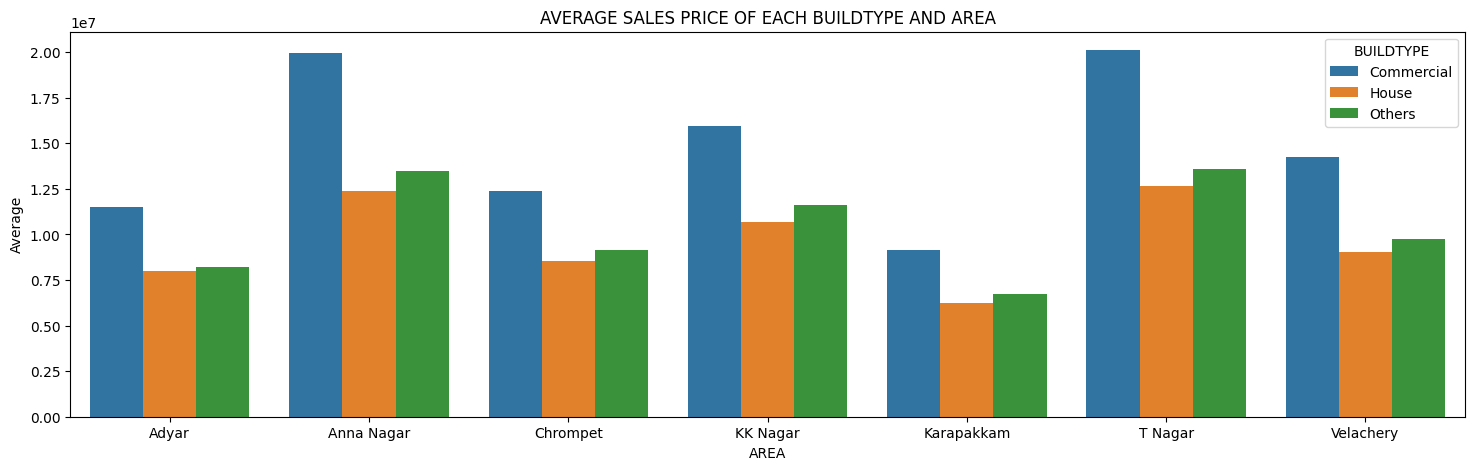

In [114]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Average',data=mmm_df,hue='BUILDTYPE')
plt.title('AVERAGE SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()

## **ENCODING CATEGORICAL FEATURES**

In [115]:
le=LabelEncoder()

In [116]:
df['PARK_FACIL']=le.fit_transform(df['PARK_FACIL'])
df['AREA']=le.fit_transform(df['AREA'])
df['BUILDTYPE']=le.fit_transform(df['BUILDTYPE'])
df['SALE_COND']=le.fit_transform(df['SALE_COND'])
df['UTILITY_AVAIL']=le.fit_transform(df['UTILITY_AVAIL'])
df['STREET']=le.fit_transform(df['STREET'])
df['MZZONE']=le.fit_transform(df['MZZONE'])

## **FEATURE IMPORTANCE**

In [117]:
X=df.drop(['SALES_PRICE (Target)'],axis=1)
y=df['SALES_PRICE (Target)']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

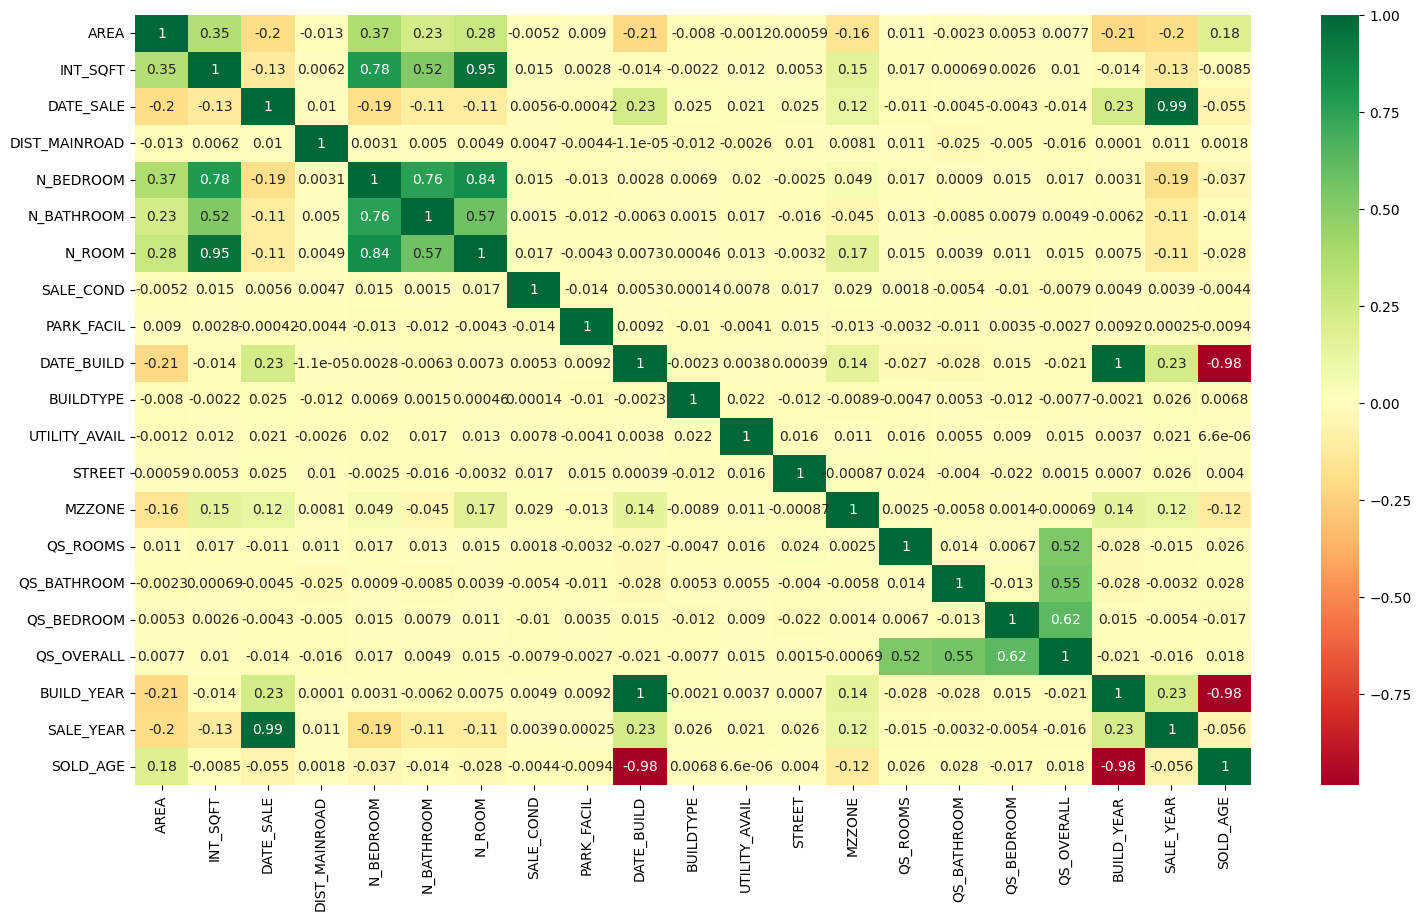

In [118]:
#Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True,cmap='RdYlGn')
plt.show()

In [119]:
corr_features = ['DATE_BUILD','BUILD_YEAR','DATE_SALE','SALE_YEAR']
prev_shape = df.shape 
df = df.drop(columns= corr_features, axis=1)

In [120]:
print(f"PREVIOUSLY THE NO. OF FEATURE IS: {df.shape}\nNOW THE NO. OF FEATURES ARE: {prev_shape}")

PREVIOUSLY THE NO. OF FEATURE IS: (7109, 18)
NOW THE NO. OF FEATURES ARE: (7109, 22)


### **CORRELATION WITH TARGET VARIABLE**

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE (Target),SOLD_AGE
SALES_PRICE (Target),-0.019138,0.612125,0.018783,0.330987,0.108834,0.60276,-0.030732,0.146428,-0.436276,-0.023812,-0.042652,0.427789,0.021967,-0.011377,0.018804,0.020485,1.0,-0.118842


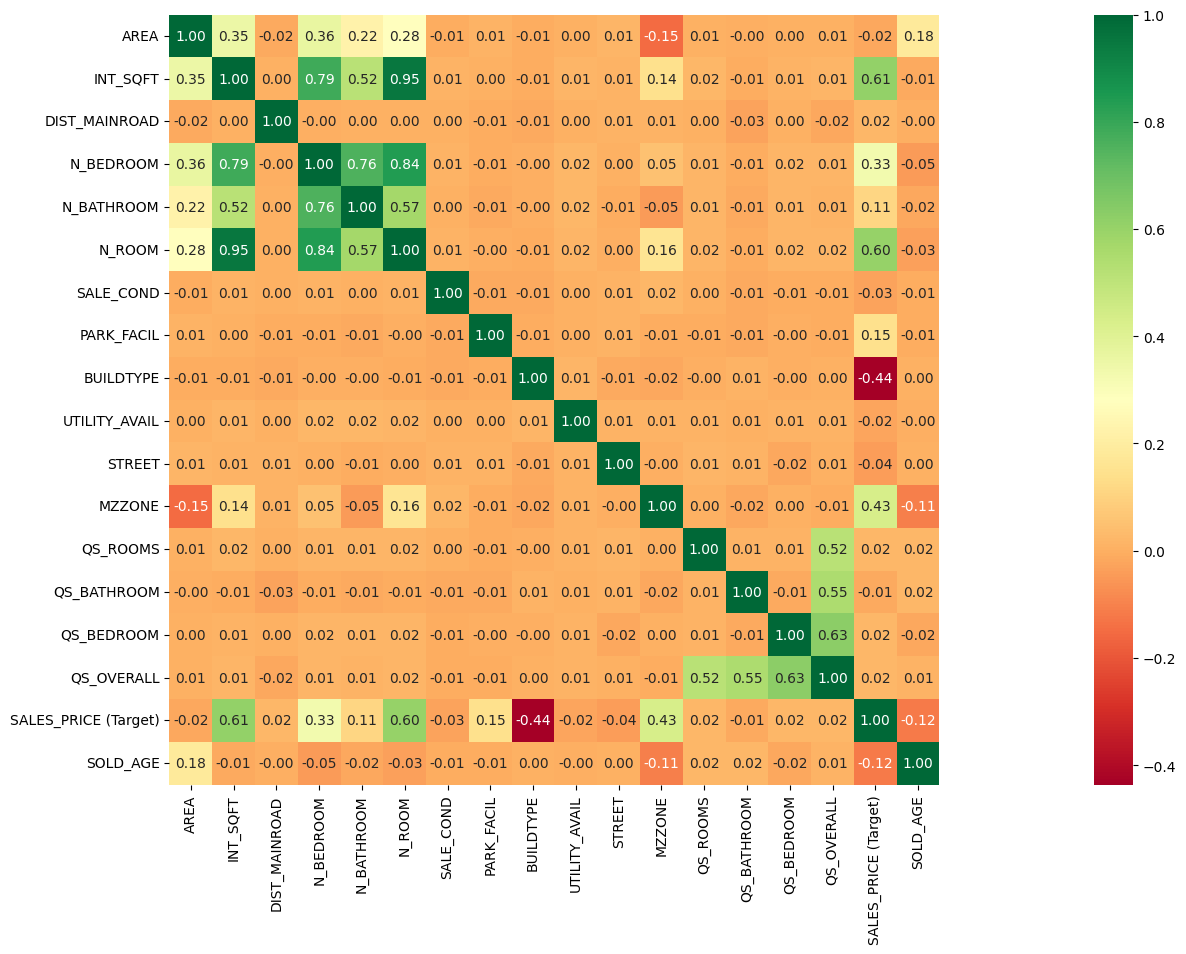

In [122]:
#correlation matrix
corrmat = df.corr()
plt.figure(figsize=(40, 10))
sns.heatmap(corrmat, cbar=True, fmt='.2f', annot=True, cmap='RdYlGn', square=True)
i=pd.DataFrame(df[df.columns[:]].corr()['SALES_PRICE (Target)'][:]).T
i=i.iloc[0]
pd.DataFrame(i).T

## **Normalization**

In [262]:
continuous_features = ['INT_SQFT', 'DIST_MAINROAD', 'SOLD_AGE','SALES_PRICE (Target)']

scaler = StandardScaler()

for feature in continuous_features:
    df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))


In [263]:
X=df.drop(['SALES_PRICE (Target)'],axis=1).values
y=df['SALES_PRICE (Target)'].values


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape # verify


((5687, 17), (1422, 17), (5687,), (1422,))

In [264]:
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add intercept term
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]    # Add intercept term

X_train_bias.shape, X_test_bias.shape

((5687, 18), (1422, 18))

# **APPLYING MODELS**

In [265]:
# Helper function for evaluation 
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Specs
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred) 

    # Testing Specs
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)  

    return y_test_pred, mae_train, mse_train, rmse_train, r2_train, mae_test, mse_test, rmse_test, r2_test

# Display results function
def display_results(model_name, results, y_test):
    y_pred, mae_train, mse_train, rmse_train, r2_train, mae_test, mse_test, rmse_test, r2_test = results
    print(f"{model_name}:")
    print(f"Training: MAE={mae_train:.2f}, MSE={mse_train:.2f}, RMSE={rmse_train:.2f}, R2={r2_train:.2f}")
    print(f"Testing: MAE={mae_test:.2f}, MSE={mse_test:.2f}, RMSE={rmse_test:.2f}, R2={r2_test:.2f}\n")

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions", color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.legend()
    plt.grid(True)
    plt.show()

### **Linear Regression - Built In**

Linear Regression:
Training: MAE=0.37, MSE=0.20, RMSE=0.45, R2=0.79
Testing: MAE=0.38, MSE=0.22, RMSE=0.46, R2=0.79



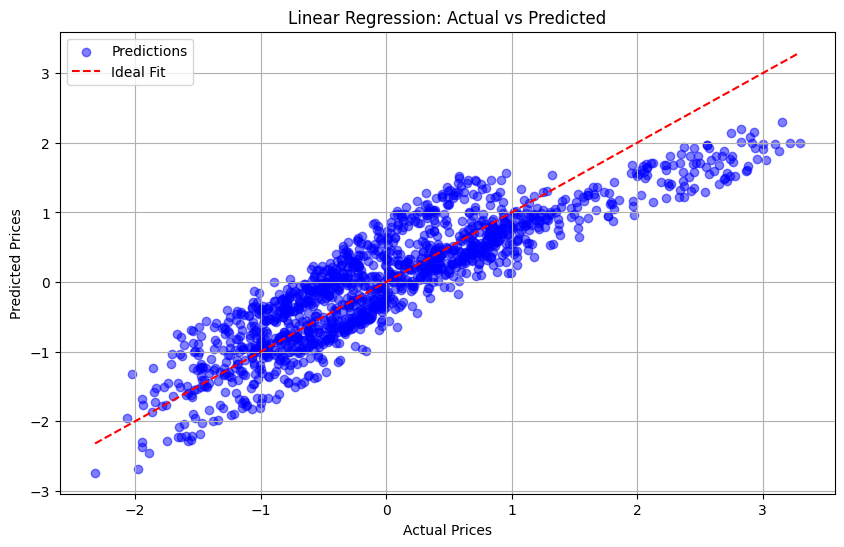

In [266]:
linear_model = LinearRegression()
linear_model.fit(X_train_bias, y_train)
results = evaluate_model(linear_model, X_train_bias, X_test_bias, y_train, y_test)
display_results("Linear Regression", results, y_test)


## **Linear Regression with Gradient Descent**

Testing: MAE=0.38, MSE=0.22, R2=0.78


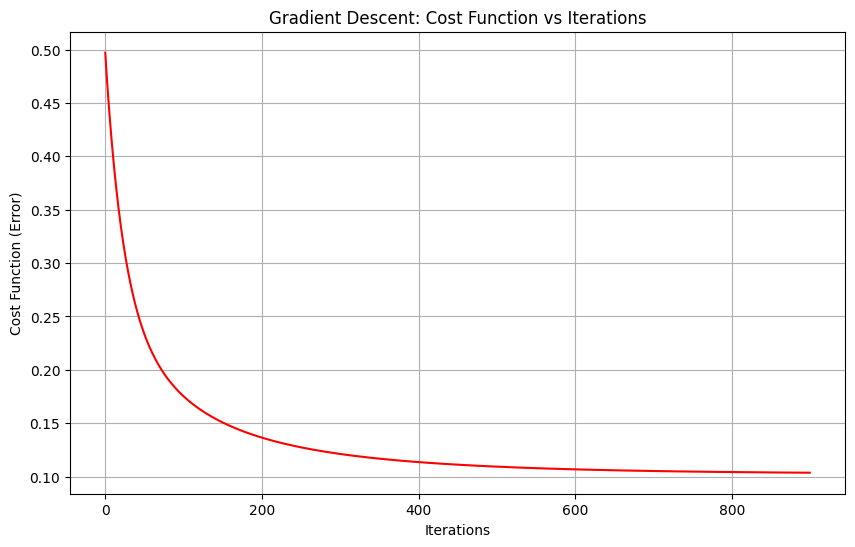

In [267]:
def gradient_descent(X, y, learning_rate=0.01, iterations=900):
    m = len(y)
    theta = np.zeros(X.shape[1])  # Initialize theta with zeros
    cost_history = []
    
    for i in range(iterations):
        prediction = X.dot(theta)
        error = prediction - y
        cost = (1/(2*m)) * np.sum(error ** 2)
        cost_history.append(cost)
        
        gradient = (1/m) * X.T.dot(error)
        theta -= learning_rate * gradient
    
    return theta, cost_history


theta, cost_history = gradient_descent(X_train_bias, y_train, learning_rate=0.01)

y_pred_gd = X_test_bias.dot(theta)

# Gradient Descent Errors
print(f"Testing: MAE={mean_absolute_error(y_test, y_pred_gd):.2f}, MSE={mean_squared_error(y_test, y_pred_gd):.2f}, R2={r2_score(y_test, y_pred_gd):.2f}")


# Plotting the Gradient Descent Cost History (Error) over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, color='red')
plt.title('Gradient Descent: Cost Function vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost Function (Error)')
plt.grid(True)
plt.show()

## **Random Forest**

Random Forest Regression:
Training: MAE=0.26, MSE=0.11, RMSE=0.34, R2=0.88
Testing: MAE=0.28, MSE=0.13, RMSE=0.36, R2=0.87



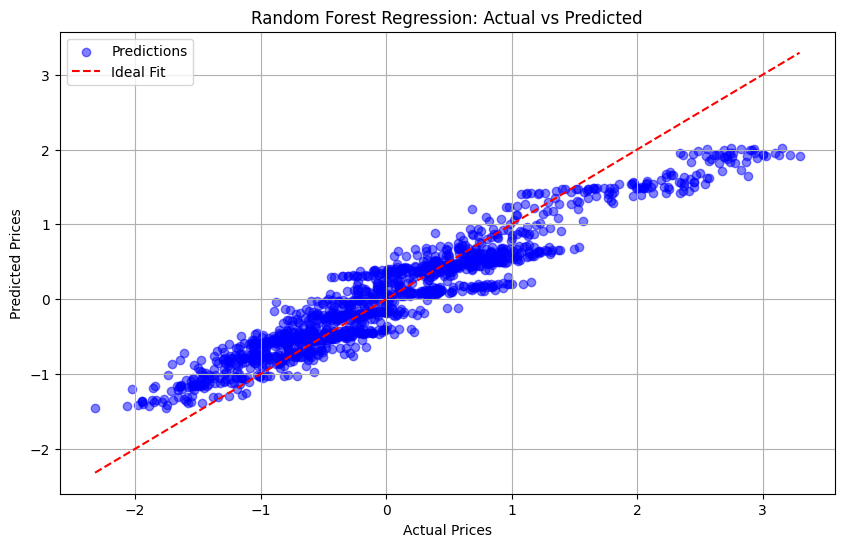

In [268]:
random_forest = RandomForestRegressor(n_estimators= 1000, max_depth = 5, max_features='sqrt')
random_forest.fit(X_train, y_train)
results = evaluate_model(random_forest, X_train, X_test, y_train, y_test)
display_results("Random Forest Regression", results, y_test)

    We used the sqrt because the model was becoming overfit

## **Multilayer Perceptron**

MLP Regression:
Training: MAE=0.17, MSE=0.05, RMSE=0.21, R2=0.95
Testing: MAE=0.17, MSE=0.05, RMSE=0.22, R2=0.95



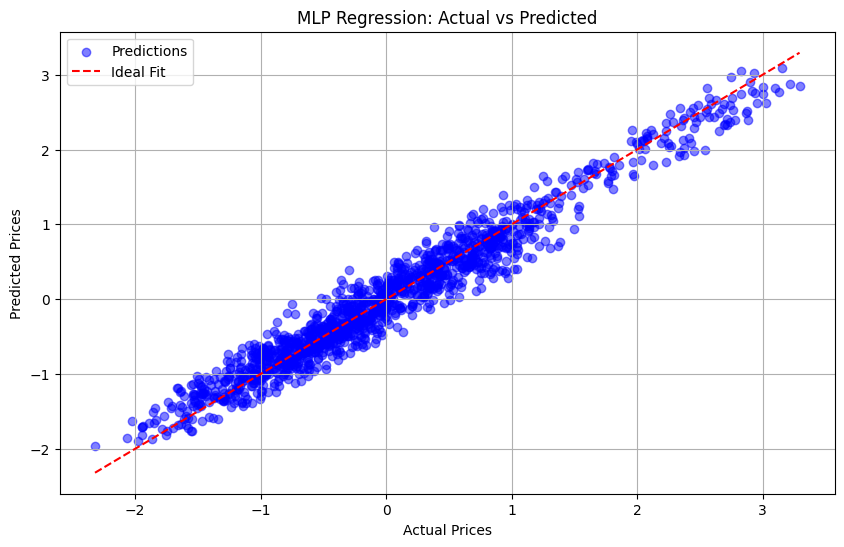

In [269]:
mlp = MLPRegressor(hidden_layer_sizes=(5,5),alpha=1, max_iter=500, random_state=42)
mlp.fit(X_train_bias, y_train)
results = evaluate_model(mlp, X_train_bias, X_test_bias, y_train, y_test)
display_results("MLP Regression", results, y_test)

## **Ridge Regression**

Ridge Regression:
Training: MAE=0.37, MSE=0.20, RMSE=0.45, R2=0.79
Testing: MAE=0.38, MSE=0.22, RMSE=0.46, R2=0.79



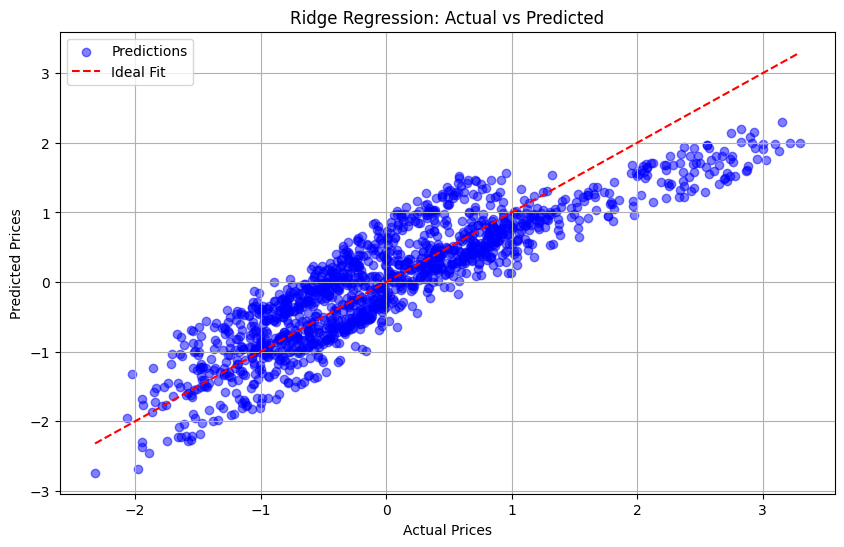

In [ ]:
ridge = Ridge()
ridge.fit(X_train_bias, y_train)

ridge_results = evaluate_model(ridge, X_train_bias, X_test_bias, y_train, y_test)
display_results("Ridge Regression", ridge_results, y_test)

## **Lasso Regression**

Lasso Regression:
Training: MAE=0.37, MSE=0.21, RMSE=0.45, R2=0.79
Testing: MAE=0.38, MSE=0.22, RMSE=0.47, R2=0.78



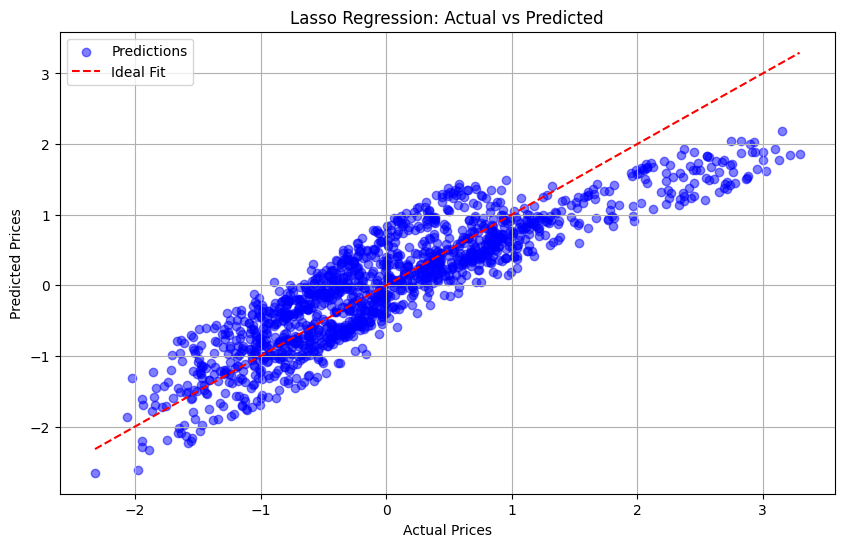

In [271]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_bias, y_train)

# Evaluation
lasso_results = evaluate_model(lasso, X_train_bias, X_test_bias, y_train, y_test)
display_results("Lasso Regression", lasso_results, y_test)

## **SVR**

SVR Regression:
Training: MAE=0.07, MSE=0.01, RMSE=0.09, R2=0.99
Testing: MAE=0.08, MSE=0.01, RMSE=0.11, R2=0.99



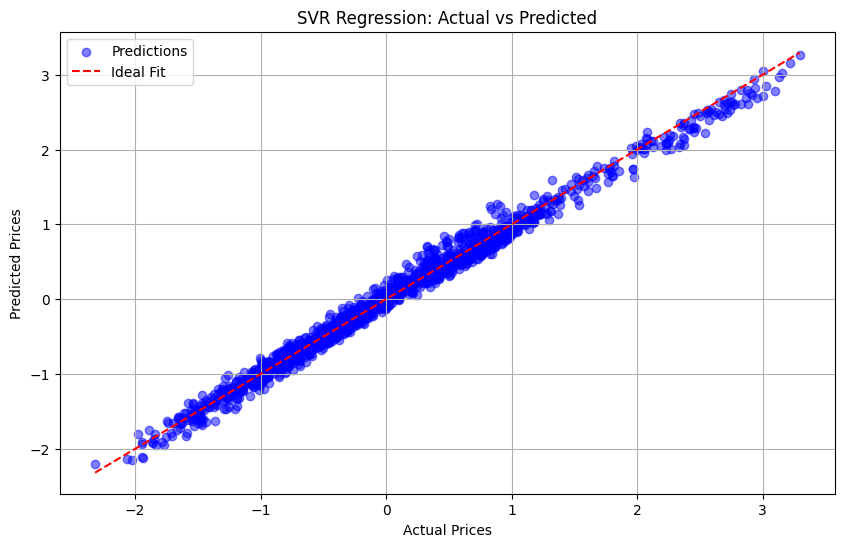

Cross-Validation R2 Scores: [0.98704181 0.98715382 0.98744801 0.98720637 0.98800629]
Mean CV R2 Score: 0.9873712602373338


In [ ]:
svr = SVR(C=50, epsilon=0.1, kernel='rbf', gamma=0.01)
svr.fit(X_train, y_train)

svr_results = evaluate_model(svr, X_train, X_test, y_train, y_test)
display_results("SVR Regression", svr_results, y_test)


## **Decision Tree**

Decision Tree Regression:
Training: MAE=0.18, MSE=0.05, RMSE=0.23, R2=0.95
Testing: MAE=0.19, MSE=0.06, RMSE=0.24, R2=0.94



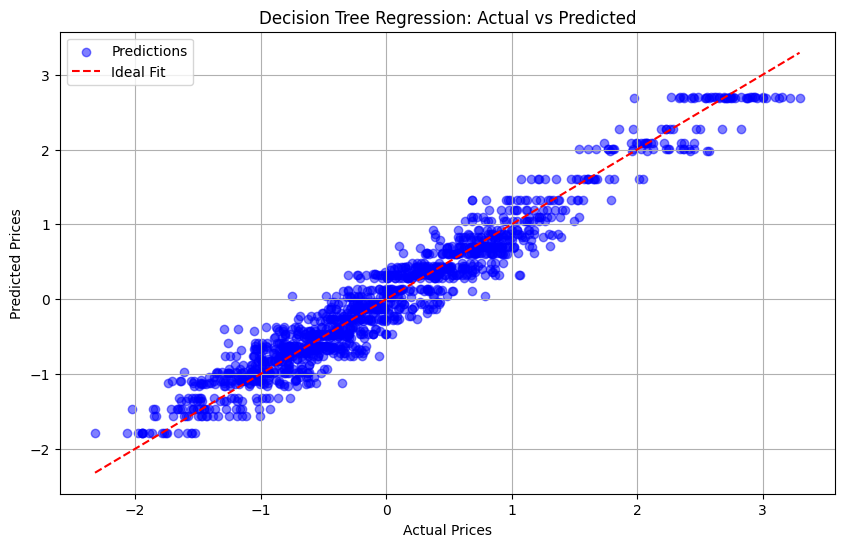

In [274]:
dt_regressor = DecisionTreeRegressor(max_depth=15, min_samples_split=100, min_samples_leaf=30, random_state=42)
dt_regressor.fit(X_train, y_train)

dt_results = evaluate_model(dt_regressor, X_train, X_test, y_train, y_test)
display_results("Decision Tree Regression", dt_results, y_test)

In [4]:
import pandas as pd

def update_formlink(file1_path, file2_path, output_file_path):
    # Read the input files
    file1 = pd.read_excel(file1_path)
    file2 = pd.read_excel(file2_path)

    # Ensure required columns exist in file1
    required_columns_file1 = ['Form Link', 'Row No.']
    for col in required_columns_file1:
        if col not in file1.columns:
            raise ValueError(f"Column '{col}' is missing in file1.")

    # Ensure 'Row No.' exists in file2 for matching
    if 'Row No.' not in file2.columns:
        # Add a 'Row No.' column in file2 to align rows
        file2['Row No.'] = file2.index + 1  # 1-indexed row numbers

    # Update the 'Form Link' in file2 based on file1's 'Row No.'
    for _, row in file1.iterrows():
        row_no = int(row['Row No.']) - 1  # Convert to 0-indexed for pandas
        if 0 <= row_no < len(file2):
            file2.loc[row_no, 'Form Link'] = row['Form Link']

    # Save the updated file2 to a new Excel file
    file2.to_excel(output_file_path, index=False)
    print(f"Updated file saved as {output_file_path}")

# Example usage
file1_path = "missing.xlsx"  # Path to the file containing 'Form Link' and 'Row No.'
file2_path = "cleaned_file.xlsx"  # Path to the file to be updated
output_file_path = "updated_file2.xlsx"  # Path to save the updated file

update_formlink(file1_path, file2_path, output_file_path)


Updated file saved as updated_file2.xlsx


# **Conclusions and Observations**
### **For Data:**
- Adyar: Commercial buildings have the highest average price, followed by Others and then Houses.
- Anna Nagar: Commercial buildings have the highest average price, followed by Houses and then Others.
- Chrompet: Commercial buildings have the highest average price, followed by Houses and then Others.
- KK Nagar: Commercial buildings have the highest average price, followed by Others and then Houses.
- Karapakkam: Commercial buildings have the highest average price, followed by Houses and then Others.
- T Nagar: Commercial buildings have the highest average price, followed by Others and then Houses.
- Velachery: Commercial buildings have the highest average price, followed by Others and then Houses.
### **For Predictive Models:**
- R2 Score for Built-in Linear Regression was 0.79
- R2 Score for Iterative Linear Regression was 0.79
- R2 Score for Random Forest was 0.87
- R2 Score for Decision Tree was 0.94
- R2 Score for SVR was 0.99
- R2 Score for Lasso Regression was 0.79
- R2 Score for Ridge Regression was 0.79
- R2 Score for Multi Layer Preceptron Regression was 0.95
    
***This indicates that considering this dataset, the features used, and the predictive models used, MLP would be an efficient model***